# Manually implementing Artificial neural network in python to predict face expression in dataset

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
% cd /content/drive/MyDrive/facial\ expression\ dataset

/content/drive/MyDrive/facial expression dataset


In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
label = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

In [ ]:
Y = np.array(df.iloc[: , 0].astype(int))

In [ ]:
X = []
for i in range(len(df)):
  x = np.array(df.iloc[i][1].split()).astype(float)/ 255
  X.append(x)

In [ ]:
X = np.array(X)

In [ ]:
X.shape

(28709, 2304)

## lets visualize the data with label

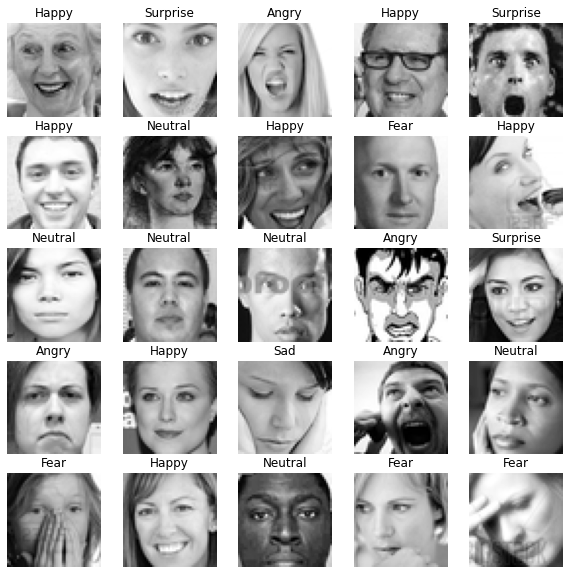

In [ ]:
plt.figure(figsize = (10,10))
for i in range (25):
  ax = plt.subplot(5,5,i+1)
  plt.imshow(X[i+25].reshape((48 , 48)) ,  cmap = "gray")
  plt.title(label[Y[i+25]])
  plt.axis("off")

In [ ]:
xtrain , xtest , ytrain ,ytest = train_test_split(X ,Y)

In [ ]:
xtrain.shape

(21531, 2304)

# Lets write our own class for Artificial neural network

In [ ]:
class ANN:
    def __init__(self , hidden_units = 200):
        self.W1 = None
        self.W2 = None
        self.M = hidden_units
    
    @staticmethod
    def softmax(x):
        expA = np.exp(x)
        return (expA / expA.sum(axis = 1 , keepdims = True))
    
    
    @staticmethod
    def sigmoid(x):
        return (1 / 1 + np.exp(-x))


    @staticmethod
    def cross_entropy(true_t , y):
        return (-np.sum(true_t * np.log(y)))


    def forward(self , w1 , w2 , x):
        z = np.tanh(x.dot(w1))
        y = self.softmax(z.dot(w2))
        return z , y


    def fit(self , input_x , true_y , learning_rate = 1e-6 , l1 = 1e-6, epochs =10000 , show_cost_fig = True):
        N ,D = np.shape(input_x)

        x = np.concatenate((np.ones((N ,1)) , input_x) , axis = 1)
        
        K = len(set(true_y))        
         
        #converting true_y[n] matrix to true_y[n,k]
        true_t = np.zeros((N ,K ))
        for i in range(len(true_y)):
            true_t[i , true_y[i]] = 1

        
        if (self.W1 is None):
            self.W1 = np.random.randn(D + 1 , self.M) / np.sqrt(D+1) # D+1 is because bias term added in column
            self.W2 = np.random.randn(self.M , K) / np.sqrt(self.M)
        
        costs = []
        for i in range(epochs):
            #forward propagation
            Z , Y = self.forward(self.W1 , self.W2 , x)

            #gradient descent
            y_t = Y - true_t
            self.W2 -= learning_rate*(Z.T.dot(y_t) + l1*self.W2)
            #dz = y_t.dot(self.W2.T)*Z*(1-Z)  # sigmoid in hidden layer
            dz = y_t.dot(self.W2.T) * (1 - Z*Z) # tanh in hidden layer
            self.W1 -= learning_rate*(x.T.dot(dz) + l1*self.W1)


            if (i%50 == 0):
                c = self.cross_entropy(true_t , Y)
                costs.append([i , c])
                acc = self.accuracy(Y , true_y)
                print(f"epochs: {i} --- cross_entropy : {c} --- Accuracy : {acc}")


        if(show_cost_fig):
            costs = np.array(costs)
            plt.plot(costs[: ,0] , costs[: ,1])


    def accuracy(self , y ,true_y):
        return (np.mean(np.argmax(y , axis = 1) == true_y))

    def predict(self , x):
        x = np.concatenate((np.ones((len(x) ,1)) , x) , axis = 1)
        _ , y = self.forward(self.W1 , self.W2 , x)
        return np.argmax(y, axis =1)


    def score(self , x , true_y):
        return np.mean(self.predict(x) == true_y)



In [ ]:
ann = ANN()

epochs: 0 --- cross_entropy : 417963.67931809096 --- Accuracy : 0.14016998745994147
epochs: 50 --- cross_entropy : 164538.7532688666 --- Accuracy : 0.19451024104779155
epochs: 100 --- cross_entropy : 138885.60380112805 --- Accuracy : 0.2008731596303005
epochs: 150 --- cross_entropy : 125008.34699242374 --- Accuracy : 0.20431006455807904
epochs: 200 --- cross_entropy : 113849.4989017825 --- Accuracy : 0.20551762574892016
epochs: 250 --- cross_entropy : 105290.86704173045 --- Accuracy : 0.20565695973247874
epochs: 300 --- cross_entropy : 98193.56694250702 --- Accuracy : 0.20482095583112722
epochs: 350 --- cross_entropy : 92103.04016963312 --- Accuracy : 0.20533184710417537
epochs: 400 --- cross_entropy : 86677.18968502594 --- Accuracy : 0.20862941804839533
epochs: 450 --- cross_entropy : 82031.67266228025 --- Accuracy : 0.21387766476243555
epochs: 500 --- cross_entropy : 78137.312029245 --- Accuracy : 0.21276299289396683
epochs: 550 --- cross_entropy : 74489.09001983651 --- Accuracy : 0.

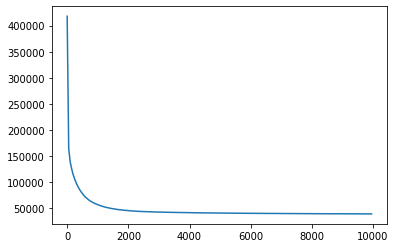

In [ ]:
ann.fit(xtrain , ytrain)

In [ ]:
ann.score(xtrain , ytrain)

0.2806186428870001

In [ ]:
ann.score(xtest , ytest)

0.25940373363053776

In [ ]:
pred = ann.predict(xtest)

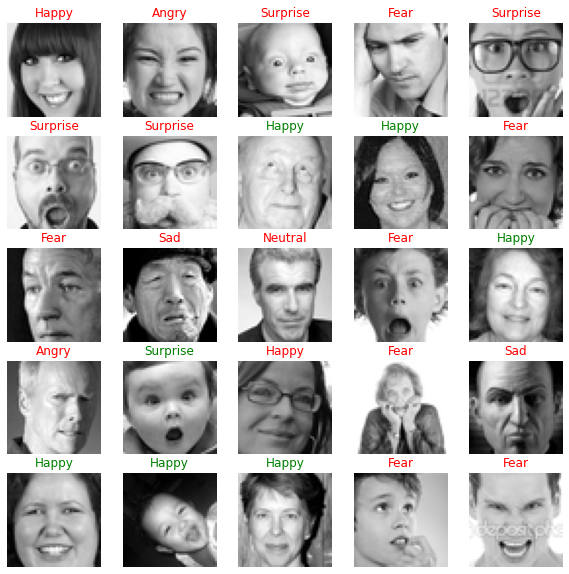

In [ ]:
plt.figure(figsize = (10,10))
for i in range (25):
    c = "red"
    if (ytest[i] == pred[i]):
        c = "green"
    ax = plt.subplot(5,5,i+1)
    plt.imshow(xtest[i].reshape((48 , 48)) ,  cmap = "gray")
    plt.title(label[ytest[i]] , color = c)
    plt.axis("off")

# If we do some hyparameter opotimization and run it for more number of epochs we could improve the results